In [1]:
# 1️⃣ Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score
)

In [2]:
# 2️⃣ Load Dataset
df = pd.read_csv("Mall_Customers.csv")     # Pastikan file sudah diupload ke Colab
print("Jumlah data :", df.shape)
df.head()

Jumlah data : (200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# 3️⃣ Data Preprocessing
# Hapus kolom ID karena tidak relevan
df = df.drop(columns=["CustomerID"])

# Encode Gender → numerik (Female=0, Male=1)
df["Gender"] = LabelEncoder().fit_transform(df["Gender"])

# Tambahkan kolom target klasifikasi
# Pelanggan Premium (1) jika Spending Score >= 60, Reguler (0) jika < 60
df["CustomerType"] = np.where(df["Spending Score (1-100)"] >= 60, 1, 0)

# Pisahkan fitur dan target
X = df[["Gender", "Age", "Annual Income (k$)", "Spending Score (1-100)"]]
y = df["CustomerType"]

In [4]:
# 4️⃣ Split Data (Train : Test = 70 : 30)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


In [5]:
# 5️⃣ Feature Scaling (WAJIB untuk KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

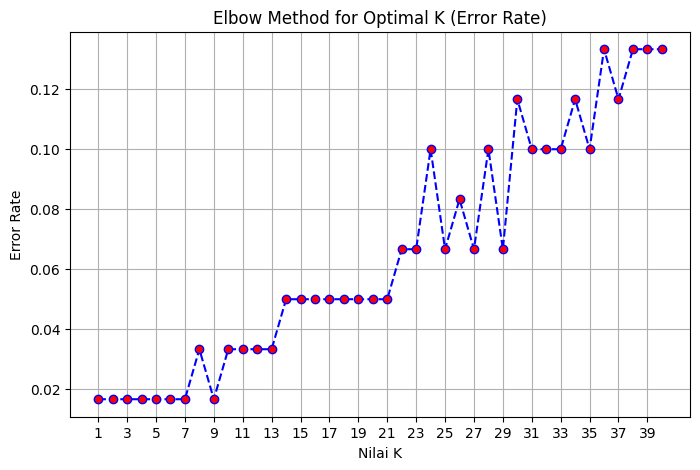

Nilai K optimal yang dipilih = 5


In [11]:
# 6️⃣ Eksperimen Menentukan Nilai K Optimal (Elbow Method for Error Rate)
error_rates = []
k_range = range(1, 41)

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred_k = knn.predict(X_test_scaled)
    error_rates.append(np.mean(y_pred_k != y_test))

plt.figure(figsize=(8,5))
plt.plot(k_range, error_rates, color='blue', linestyle='--', marker='o', markerfacecolor='red')
plt.title("Elbow Method for Optimal K (Error Rate)")
plt.xlabel("Nilai K")
plt.ylabel("Error Rate")
plt.xticks(range(1,41,2))
plt.grid(True)

# Simpan grafik untuk ditampilkan di halaman web Flask
plt.savefig("static/elbow_plot.png")

plt.show()

# Berdasarkan grafik (biasanya error terendah di k ≈ 5)
optimal_k = 5
print("Nilai K optimal yang dipilih =", optimal_k)


In [7]:
# 7️⃣ Implementasi Model Final & Evaluasi
knn_final = KNeighborsClassifier(n_neighbors=optimal_k)
knn_final.fit(X_train_scaled, y_train)
y_pred = knn_final.predict(X_test_scaled)

print("\n=== Hasil Evaluasi Model KNN (k={}) ===".format(optimal_k))
print("Akurasi :", round(accuracy_score(y_test, y_pred)*100, 2), "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


=== Hasil Evaluasi Model KNN (k=5) ===
Akurasi : 98.33 %

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        41
           1       1.00      0.95      0.97        19

    accuracy                           0.98        60
   macro avg       0.99      0.97      0.98        60
weighted avg       0.98      0.98      0.98        60


Confusion Matrix:
 [[41  0]
 [ 1 18]]


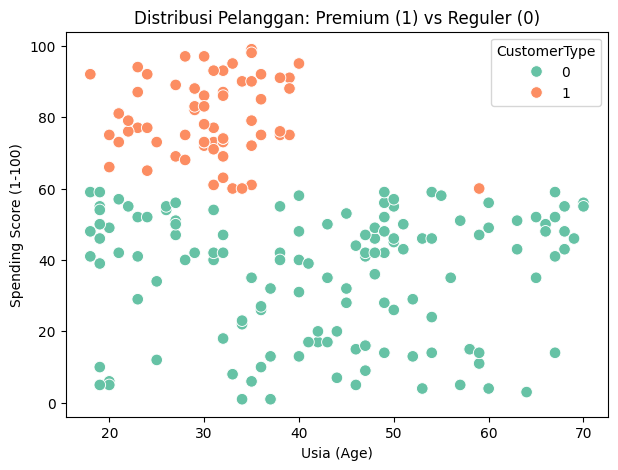

In [8]:
# 8️⃣ Visualisasi Hasil Klasifikasi
plt.figure(figsize=(7,5))
sns.scatterplot(
    x=X["Age"], y=X["Spending Score (1-100)"],
    hue=y, palette="Set2", s=70
)
plt.title("Distribusi Pelanggan: Premium (1) vs Reguler (0)")
plt.xlabel("Usia (Age)")
plt.ylabel("Spending Score (1-100)")
plt.legend(title="CustomerType")
plt.show()

In [9]:
# 9️⃣ Simulasi Prediksi Data Baru (Deployment sederhana)
# Contoh pelanggan baru: Pria, usia 27 tahun, pendapatan 55k, skor pengeluaran 80
new_customer = np.array([[1, 27, 55, 80]])
new_customer_scaled = scaler.transform(new_customer)
pred = knn_final.predict(new_customer_scaled)

hasil = "Premium" if pred[0] == 1 else "Reguler"
print(f"\nPrediksi untuk pelanggan baru: {hasil}")


Prediksi untuk pelanggan baru: Premium


c:\Users\ZENBOOK\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [10]:
import joblib
# Simpan model dan scaler
joblib.dump(knn_final, "knn_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']